# Data Visualization - Tech Industry Salaries

This notebook creates comprehensive visualizations to explore and communicate salary trends.

## Objectives:
- Create distribution plots
- Visualize salary comparisons across dimensions
- Show temporal trends
- Generate interactive charts
- Export publication-ready visualizations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
sns.set_context('notebook', font_scale=1.1)

# Set display options
pd.set_option('display.max_columns', None)
%matplotlib inline

## 1. Load Data

In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/cleaned/ds_salaries_cleaned.csv')

print(f"Dataset loaded: {df.shape[0]:,} rows")
print(f"Date range: {df['work_year'].min()} - {df['work_year'].max()}")

# Define color schemes
colors = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#06A77D',
    'warning': '#F77F00'
}

seniority_colors = {
    'JUNIOR': '#3A86FF',
    'MID': '#8338EC',
    'SENIOR': '#FB5607',
    'EXECUTIVE': '#FF006E'
}

Dataset loaded: 607 rows
Date range: 2020 - 2022


## 2. Overall Salary Distribution

ValueError: 'x' has size 607, but 'y2' has an unequal size of 1000

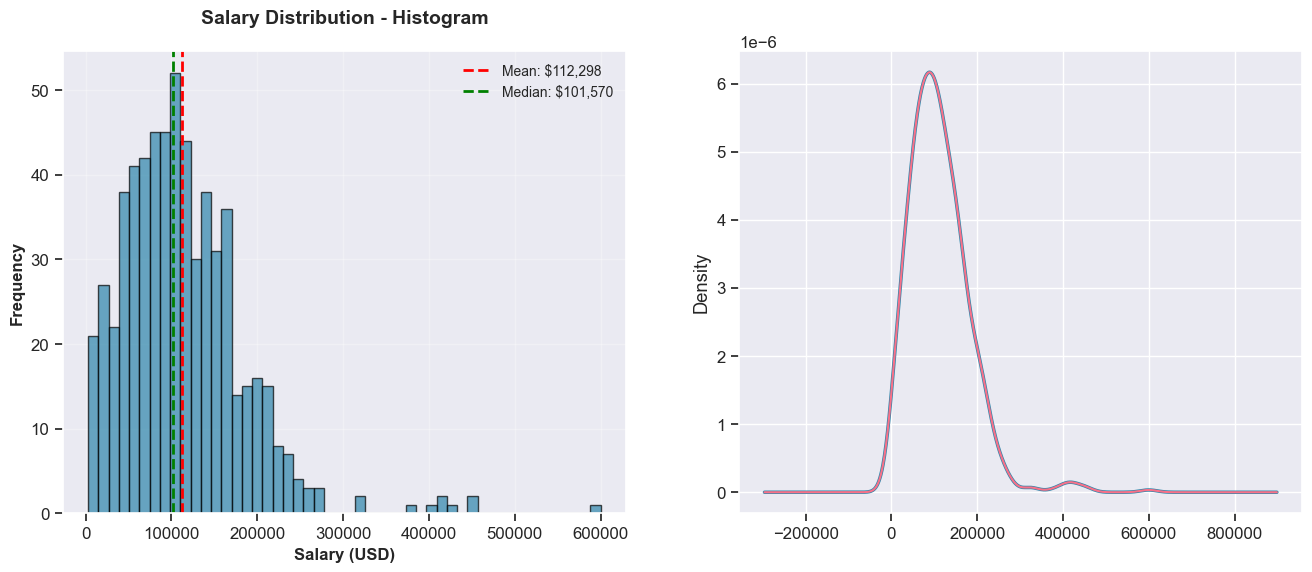

In [ ]:
# Histogram and KDE for salary distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# =========================
# Histogram
# =========================
axes[0].hist(
    df['salary_in_usd'],
    bins=50,
    alpha=0.7,
    edgecolor='black'
)

axes[0].axvline(
    df['salary_in_usd'].mean(),
    linestyle='--',
    linewidth=2,
    label=f"Mean: ${df['salary_in_usd'].mean():,.0f}"
)

axes[0].axvline(
    df['salary_in_usd'].median(),
    linestyle='--',
    linewidth=2,
    label=f"Median: ${df['salary_in_usd'].median():,.0f}"
)

axes[0].set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Salary Distribution - Histogram', fontsize=14, fontweight='bold', pad=20)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# =========================
# KDE Plot (PROFESSIONAL FIX)
# =========================
kde_plot = df['salary_in_usd'].plot(
    kind='kde',
    ax=axes[1],
    linewidth=2.5
)

# Extract KDE data from the plotted line
x_kde = kde_plot.get_lines()[0].get_xdata()
y_kde = kde_plot.get_lines()[0].get_ydata()

# Fill area under KDE curve
axes[1].fill_between(
    x_kde,
    y_kde,
    alpha=0.3
)

axes[1].set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[1].set_title('Salary Distribution - Density Plot', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(True, alpha=0.3)

# =========================
# Final touches
# =========================
plt.tight_layout()
plt.savefig(
    '../data/visualizations/01_salary_distribution.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

print("✓ Salary distribution plots created")

In [ ]:
# Box plot for overall distribution
fig, ax = plt.subplots(figsize=(14, 6))

box = ax.boxplot([df['salary_in_usd']], 
                  vert=False, 
                  patch_artist=True,
                  widths=0.7,
                  showmeans=True,
                  meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

box['boxes'][0].set_facecolor(colors['primary'])
box['boxes'][0].set_alpha(0.7)

ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_title('Overall Salary Distribution - Box Plot', fontsize=14, fontweight='bold', pad=20)
ax.set_yticklabels(['All Positions'])
ax.grid(True, alpha=0.3, axis='x')

# Add statistics as text
stats_text = f"""Mean: ${df['salary_in_usd'].mean():,.0f}
Median: ${df['salary_in_usd'].median():,.0f}
Q1: ${df['salary_in_usd'].quantile(0.25):,.0f}
Q3: ${df['salary_in_usd'].quantile(0.75):,.0f}"""
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../data/visualizations/02_salary_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Box plot created")

## 3. Salary by Seniority Level

In [ ]:
# Box plot by seniority
fig, ax = plt.subplots(figsize=(14, 8))

seniority_order = ['JUNIOR', 'MID', 'SENIOR', 'EXECUTIVE']
df_plot = df[df['seniority'].isin(seniority_order)]

sns.boxplot(data=df_plot, x='seniority', y='salary_in_usd', 
            order=seniority_order, palette=seniority_colors, ax=ax)

# Add mean markers
means = df_plot.groupby('seniority')['salary_in_usd'].mean().reindex(seniority_order)
positions = range(len(seniority_order))
ax.scatter(positions, means, color='red', s=200, zorder=10, marker='D', 
           label='Mean', edgecolors='darkred', linewidths=2)

ax.set_xlabel('Seniority Level', fontsize=13, fontweight='bold')
ax.set_ylabel('Salary (USD)', fontsize=13, fontweight='bold')
ax.set_title('Salary Distribution by Seniority Level', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Add count labels
for i, level in enumerate(seniority_order):
    count = len(df_plot[df_plot['seniority'] == level])
    ax.text(i, ax.get_ylim()[1] * 0.95, f'n={count}', 
            ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/visualizations/03_salary_by_seniority.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Seniority comparison plot created")

In [ ]:
# Bar chart with mean salaries by seniority
fig, ax = plt.subplots(figsize=(12, 7))

seniority_means = df.groupby('seniority')['salary_in_usd'].mean().reindex(seniority_order)
bars = ax.bar(seniority_order, seniority_means, 
              color=[seniority_colors[s] for s in seniority_order],
              alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (level, value) in enumerate(zip(seniority_order, seniority_means)):
    ax.text(i, value + 5000, f'${value:,.0f}', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Seniority Level', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Salary (USD)', fontsize=13, fontweight='bold')
ax.set_title('Average Salary by Seniority Level', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/visualizations/04_avg_salary_by_seniority.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Average salary bar chart created")

## 4. Salary by Job Category

In [ ]:
# Horizontal bar chart for job categories
fig, ax = plt.subplots(figsize=(12, 8))

job_stats = df.groupby('job_category').agg({
    'salary_in_usd': ['mean', 'count']
}).round(0)
job_stats.columns = ['Mean Salary', 'Count']
job_stats = job_stats[job_stats['Count'] >= 10]  # Filter for categories with 10+ entries
job_stats = job_stats.sort_values('Mean Salary', ascending=True)

bars = ax.barh(job_stats.index, job_stats['Mean Salary'], 
               color=colors['primary'], alpha=0.8, edgecolor='black')

# Add value labels
for i, (category, row) in enumerate(job_stats.iterrows()):
    ax.text(row['Mean Salary'] + 2000, i, 
            f"${row['Mean Salary']:,.0f} (n={int(row['Count'])})", 
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Average Salary (USD)', fontsize=13, fontweight='bold')
ax.set_ylabel('Job Category', fontsize=13, fontweight='bold')
ax.set_title('Average Salary by Job Category', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../data/visualizations/05_salary_by_job_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Job category comparison created")

## 5. Geographic Analysis

In [ ]:
# Top 15 countries by salary
fig, ax = plt.subplots(figsize=(12, 10))

country_stats = df.groupby('company_location').agg({
    'salary_in_usd': ['mean', 'count']
}).round(0)
country_stats.columns = ['Mean Salary', 'Count']
country_stats = country_stats[country_stats['Count'] >= 5]
country_stats = country_stats.sort_values('Mean Salary', ascending=True).tail(15)

bars = ax.barh(country_stats.index, country_stats['Mean Salary'], 
               color=colors['secondary'], alpha=0.8, edgecolor='black')

# Highlight US
if 'US' in country_stats.index:
    us_idx = list(country_stats.index).index('US')
    bars[us_idx].set_color(colors['accent'])

# Add value labels
for i, (country, row) in enumerate(country_stats.iterrows()):
    ax.text(row['Mean Salary'] + 2000, i, 
            f"${row['Mean Salary']:,.0f}", 
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Average Salary (USD)', fontsize=13, fontweight='bold')
ax.set_ylabel('Country', fontsize=13, fontweight='bold')
ax.set_title('Top 15 Countries by Average Salary', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../data/visualizations/06_salary_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Geographic analysis plot created")

## 6. Work Setting Analysis

In [ ]:
# Violin plot for work setting
fig, ax = plt.subplots(figsize=(14, 8))

work_order = ['On-site', 'Hybrid', 'Remote']
df_work = df[df['work_setting'].isin(work_order)]

parts = ax.violinplot([df_work[df_work['work_setting'] == w]['salary_in_usd'] 
                        for w in work_order],
                       positions=range(len(work_order)),
                       showmeans=True, showmedians=True)

# Color the violins
colors_work = ['#E63946', '#F1A208', '#06A77D']
for pc, color in zip(parts['bodies'], colors_work):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax.set_xticks(range(len(work_order)))
ax.set_xticklabels(work_order)
ax.set_xlabel('Work Setting', fontsize=13, fontweight='bold')
ax.set_ylabel('Salary (USD)', fontsize=13, fontweight='bold')
ax.set_title('Salary Distribution by Work Setting', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

# Add count labels
for i, setting in enumerate(work_order):
    count = len(df_work[df_work['work_setting'] == setting])
    ax.text(i, ax.get_ylim()[1] * 0.95, f'n={count}', 
            ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/visualizations/07_salary_by_work_setting.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Work setting analysis plot created")

In [ ]:
# Pie chart for work setting distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Count distribution
work_counts = df['work_setting'].value_counts()
ax1.pie(work_counts.values, labels=work_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors_work, explode=[0.05]*len(work_counts),
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Distribution of Work Settings (by count)', fontsize=14, fontweight='bold', pad=20)

# Average salary by work setting
work_avg = df.groupby('work_setting')['salary_in_usd'].mean().sort_values(ascending=False)
bars = ax2.bar(range(len(work_avg)), work_avg.values, 
               color=colors_work, alpha=0.8, edgecolor='black')
ax2.set_xticks(range(len(work_avg)))
ax2.set_xticklabels(work_avg.index, rotation=0)
ax2.set_ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')
ax2.set_title('Average Salary by Work Setting', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(work_avg.values):
    ax2.text(i, v + 3000, f'${v:,.0f}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/visualizations/08_work_setting_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Work setting overview created")

## 7. Company Size Analysis

In [ ]:
# Salary by company size
fig, ax = plt.subplots(figsize=(12, 7))

size_order = ['Small', 'Medium', 'Large']
size_means = df.groupby('company_size_label')['salary_in_usd'].mean().reindex(size_order)

size_colors_list = ['#FFB703', '#FB8500', '#023047']
bars = ax.bar(size_order, size_means, 
              color=size_colors_list, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (size, value) in enumerate(zip(size_order, size_means)):
    count = len(df[df['company_size_label'] == size])
    ax.text(i, value + 3000, f'${value:,.0f}\n(n={count})', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Company Size', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Salary (USD)', fontsize=13, fontweight='bold')
ax.set_title('Average Salary by Company Size', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/visualizations/09_salary_by_company_size.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Company size analysis plot created")

## 8. Temporal Trends

In [ ]:
# Line plot for salary trends over years
fig, ax = plt.subplots(figsize=(14, 7))

yearly_stats = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'count'])

# Plot lines
ax.plot(yearly_stats.index, yearly_stats['mean'], 
        marker='o', linewidth=3, markersize=10, 
        color=colors['primary'], label='Mean Salary')
ax.plot(yearly_stats.index, yearly_stats['median'], 
        marker='s', linewidth=3, markersize=10, 
        color=colors['secondary'], label='Median Salary')

# Add value labels
for year in yearly_stats.index:
    mean_val = yearly_stats.loc[year, 'mean']
    median_val = yearly_stats.loc[year, 'median']
    ax.text(year, mean_val + 3000, f'${mean_val:,.0f}', 
            ha='center', fontsize=9, fontweight='bold')
    ax.text(year, median_val - 8000, f'${median_val:,.0f}', 
            ha='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Salary (USD)', fontsize=13, fontweight='bold')
ax.set_title('Salary Trends Over Time', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(yearly_stats.index)

plt.tight_layout()
plt.savefig('../data/visualizations/10_salary_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Temporal trends plot created")

In [ ]:
# Salary trends by seniority over years
fig, ax = plt.subplots(figsize=(14, 8))

for seniority in seniority_order:
    seniority_data = df[df['seniority'] == seniority].groupby('work_year')['salary_in_usd'].mean()
    ax.plot(seniority_data.index, seniority_data.values, 
            marker='o', linewidth=2.5, markersize=8,
            color=seniority_colors[seniority], label=seniority)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Salary (USD)', fontsize=13, fontweight='bold')
ax.set_title('Salary Trends by Seniority Level', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(df['work_year'].unique())

plt.tight_layout()
plt.savefig('../data/visualizations/11_salary_trends_by_seniority.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Seniority trends plot created")

## 9. Heatmaps and Correlation

In [ ]:
# Heatmap: Salary by seniority and work setting
fig, ax = plt.subplots(figsize=(10, 7))

pivot = pd.pivot_table(df, 
                       values='salary_in_usd', 
                       index='seniority', 
                       columns='work_setting',
                       aggfunc='mean').reindex(seniority_order)

sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=1, linecolor='black', ax=ax, 
            cbar_kws={'label': 'Average Salary (USD)'})

ax.set_xlabel('Work Setting', fontsize=12, fontweight='bold')
ax.set_ylabel('Seniority Level', fontsize=12, fontweight='bold')
ax.set_title('Average Salary: Seniority vs Work Setting', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../data/visualizations/12_heatmap_seniority_work.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Heatmap created")

## 10. Interactive Visualizations (Plotly)

In [ ]:
# Interactive scatter plot: Salary over time colored by seniority
fig = px.scatter(df, x='work_year', y='salary_in_usd', 
                 color='seniority',
                 size='salary_in_usd',
                 hover_data=['job_title', 'company_location', 'work_setting'],
                 category_orders={'seniority': seniority_order},
                 title='Salary Distribution Over Time by Seniority',
                 labels={'salary_in_usd': 'Salary (USD)', 'work_year': 'Year'},
                 color_discrete_map=seniority_colors,
                 height=600)

fig.update_layout(font=dict(size=12))
fig.write_html('../data/visualizations/13_interactive_scatter.html')
fig.show()

print("✓ Interactive scatter plot created")

In [ ]:
# Interactive box plot by job category
top_categories = df['job_category'].value_counts().head(8).index
df_top = df[df['job_category'].isin(top_categories)]

fig = px.box(df_top, x='job_category', y='salary_in_usd',
             color='job_category',
             title='Salary Distribution by Top Job Categories',
             labels={'salary_in_usd': 'Salary (USD)', 'job_category': 'Job Category'},
             height=600)

fig.update_layout(showlegend=False, font=dict(size=12))
fig.write_html('../data/visualizations/14_interactive_boxplot.html')
fig.show()

print("✓ Interactive box plot created")

In [ ]:
# Interactive sunburst chart: Hierarchy of job categories and seniority
sunburst_data = df.groupby(['job_category', 'seniority']).size().reset_index(name='count')
sunburst_data = sunburst_data[sunburst_data['job_category'].isin(top_categories)]

fig = px.sunburst(sunburst_data, 
                  path=['job_category', 'seniority'], 
                  values='count',
                  title='Job Distribution: Category and Seniority',
                  height=700)

fig.update_layout(font=dict(size=12))
fig.write_html('../data/visualizations/15_interactive_sunburst.html')
fig.show()

print("✓ Interactive sunburst chart created")

## 11. Comparative Analysis Dashboard

In [ ]:
# Create a comprehensive dashboard figure
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Overall distribution
ax1 = fig.add_subplot(gs[0, :])
ax1.hist(df['salary_in_usd'], bins=50, color=colors['primary'], alpha=0.7, edgecolor='black')
ax1.axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=2)
ax1.axvline(df['salary_in_usd'].median(), color='green', linestyle='--', linewidth=2)
ax1.set_title('Overall Salary Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Salary (USD)')
ax1.grid(True, alpha=0.3)

# 2. By seniority
ax2 = fig.add_subplot(gs[1, 0])
seniority_means = df.groupby('seniority')['salary_in_usd'].mean().reindex(seniority_order)
ax2.bar(range(len(seniority_order)), seniority_means, 
        color=[seniority_colors[s] for s in seniority_order], alpha=0.8)
ax2.set_xticks(range(len(seniority_order)))
ax2.set_xticklabels(seniority_order, rotation=45, ha='right')
ax2.set_title('Average Salary by Seniority', fontsize=12, fontweight='bold')
ax2.set_ylabel('Salary (USD)')
ax2.grid(True, alpha=0.3, axis='y')

# 3. By work setting
ax3 = fig.add_subplot(gs[1, 1])
work_means = df.groupby('work_setting')['salary_in_usd'].mean().sort_values(ascending=False)
ax3.barh(range(len(work_means)), work_means.values, color=colors['secondary'], alpha=0.8)
ax3.set_yticks(range(len(work_means)))
ax3.set_yticklabels(work_means.index)
ax3.set_title('Average Salary by Work Setting', fontsize=12, fontweight='bold')
ax3.set_xlabel('Salary (USD)')
ax3.grid(True, alpha=0.3, axis='x')

# 4. By company size
ax4 = fig.add_subplot(gs[1, 2])
size_means = df.groupby('company_size_label')['salary_in_usd'].mean().reindex(size_order)
ax4.bar(range(len(size_order)), size_means, color=size_colors_list, alpha=0.8)
ax4.set_xticks(range(len(size_order)))
ax4.set_xticklabels(size_order)
ax4.set_title('Average Salary by Company Size', fontsize=12, fontweight='bold')
ax4.set_ylabel('Salary (USD)')
ax4.grid(True, alpha=0.3, axis='y')

# 5. Trends over time
ax5 = fig.add_subplot(gs[2, :])
yearly_means = df.groupby('work_year')['salary_in_usd'].mean()
ax5.plot(yearly_means.index, yearly_means.values, 
         marker='o', linewidth=3, markersize=10, color=colors['primary'])
ax5.fill_between(yearly_means.index, yearly_means.values, alpha=0.3)
ax5.set_title('Salary Trend Over Time', fontsize=14, fontweight='bold')
ax5.set_xlabel('Year')
ax5.set_ylabel('Average Salary (USD)')
ax5.grid(True, alpha=0.3)
ax5.set_xticks(yearly_means.index)

# Add overall title
fig.suptitle('Tech Industry Salary Analysis - Comprehensive Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('../data/visualizations/16_comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comprehensive dashboard created")

## 12. Summary Statistics Visualization

In [ ]:
# Create a summary infographic
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.patch.set_facecolor('#F8F9FA')

stats = [
    ('Total Records', f"{len(df):,}", colors['primary']),
    ('Average Salary', f"${df['salary_in_usd'].mean():,.0f}", colors['secondary']),
    ('Median Salary', f"${df['salary_in_usd'].median():,.0f}", colors['accent']),
    ('Countries', f"{df['company_location'].nunique()}", colors['success']),
    ('Job Titles', f"{df['job_title'].nunique()}", colors['warning']),
    ('Year Range', f"{df['work_year'].min()}-{df['work_year'].max()}", '#8B5CF6')
]

for idx, (ax, (label, value, color)) in enumerate(zip(axes.flat, stats)):
    ax.text(0.5, 0.6, value, ha='center', va='center', 
            fontsize=32, fontweight='bold', color=color)
    ax.text(0.5, 0.3, label, ha='center', va='center', 
            fontsize=16, color='#495057')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Add border
    rect = plt.Rectangle((0.05, 0.1), 0.9, 0.8, fill=False, 
                         edgecolor=color, linewidth=3, transform=ax.transAxes)
    ax.add_patch(rect)

fig.suptitle('Tech Salary Dataset - Key Statistics', 
             fontsize=20, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig('../data/visualizations/17_summary_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Summary statistics infographic created")

## Summary

### Visualizations Created:

**Static Visualizations (Matplotlib/Seaborn):**
1. ✓ Salary distribution (histogram & KDE)
2. ✓ Overall salary box plot
3. ✓ Salary by seniority (box plot)
4. ✓ Average salary by seniority (bar chart)
5. ✓ Salary by job category
6. ✓ Geographic analysis (top countries)
7. ✓ Salary by work setting (violin plot)
8. ✓ Work setting overview
9. ✓ Salary by company size
10. ✓ Temporal trends
11. ✓ Seniority trends over time
12. ✓ Heatmap (seniority × work setting)
13. ✓ Comprehensive dashboard
14. ✓ Summary statistics infographic

**Interactive Visualizations (Plotly):**
1. ✓ Interactive scatter plot (time × salary)
2. ✓ Interactive box plot (job categories)
3. ✓ Interactive sunburst chart

### Files Exported:
- 17 high-resolution PNG files (300 DPI)
- 3 interactive HTML files
- All saved in `/data/visualizations/`

### Next Steps:
- Use visualizations in presentations and reports
- Create Excel dashboard with key charts
- Generate executive summary with top insights